# Data Preprocessing

In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# Read the data frame
df = pd.read_csv("c:/users/lsund/downloads/Churn_Modelling.csv", delimiter=',')
df.shape

(10000, 14)

In [3]:
# Review the top rows of what is left of the data frame
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

####  Importing Libraries

NumPy & Pandas: Used for handling data efficiently. NumPy manages numerical operations, and Pandas stores your dataset in a DataFrame for easy inspection and manipulation.

Matplotlib & Seaborn: Used for visualization. Helps you understand distributions, correlations, and trends in your dataset.

Display settings in Pandas allow you to see all rows and columns when exploring the data.



# Handle missing values

In [5]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [8]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Handle Missing Values: Fill or remove missing data to avoid errors in modeling.

Encode Categorical Variables: Convert text features (like Gender, Region, Product Type) into numeric values for models.

Scale Numerical Features: Normalize features to similar ranges to improve model performance.

Outlier Detection: Identify and treat extreme values to reduce bias in predictions.

Feature Selection: Select features that are most relevant to predicting the target.

# Exploratory Data Analysis

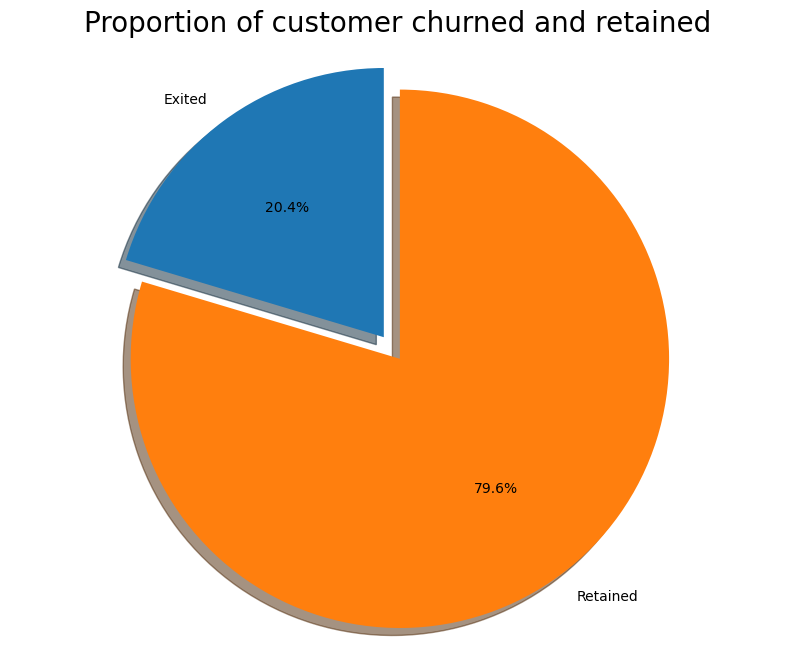

In [9]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

##### So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

# Visualize distributions

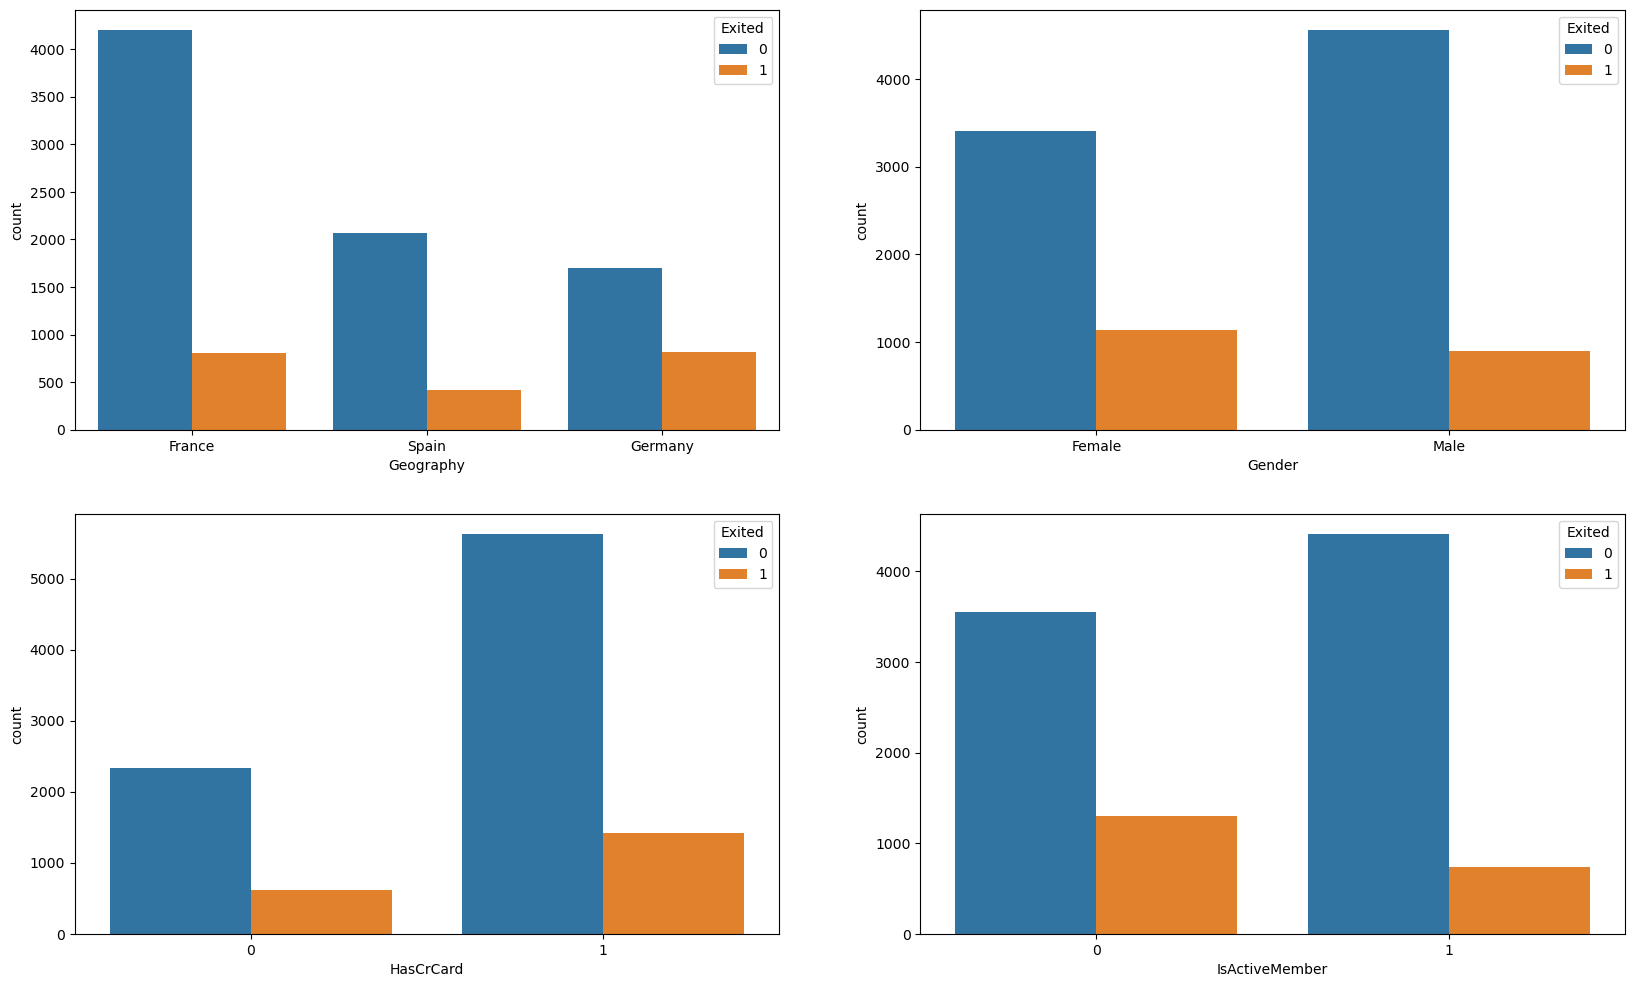

In [10]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
    plt.show()


#### We note the following:

Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

The proportion of female customers churning is also greater than that of male customers

Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

# Outliers

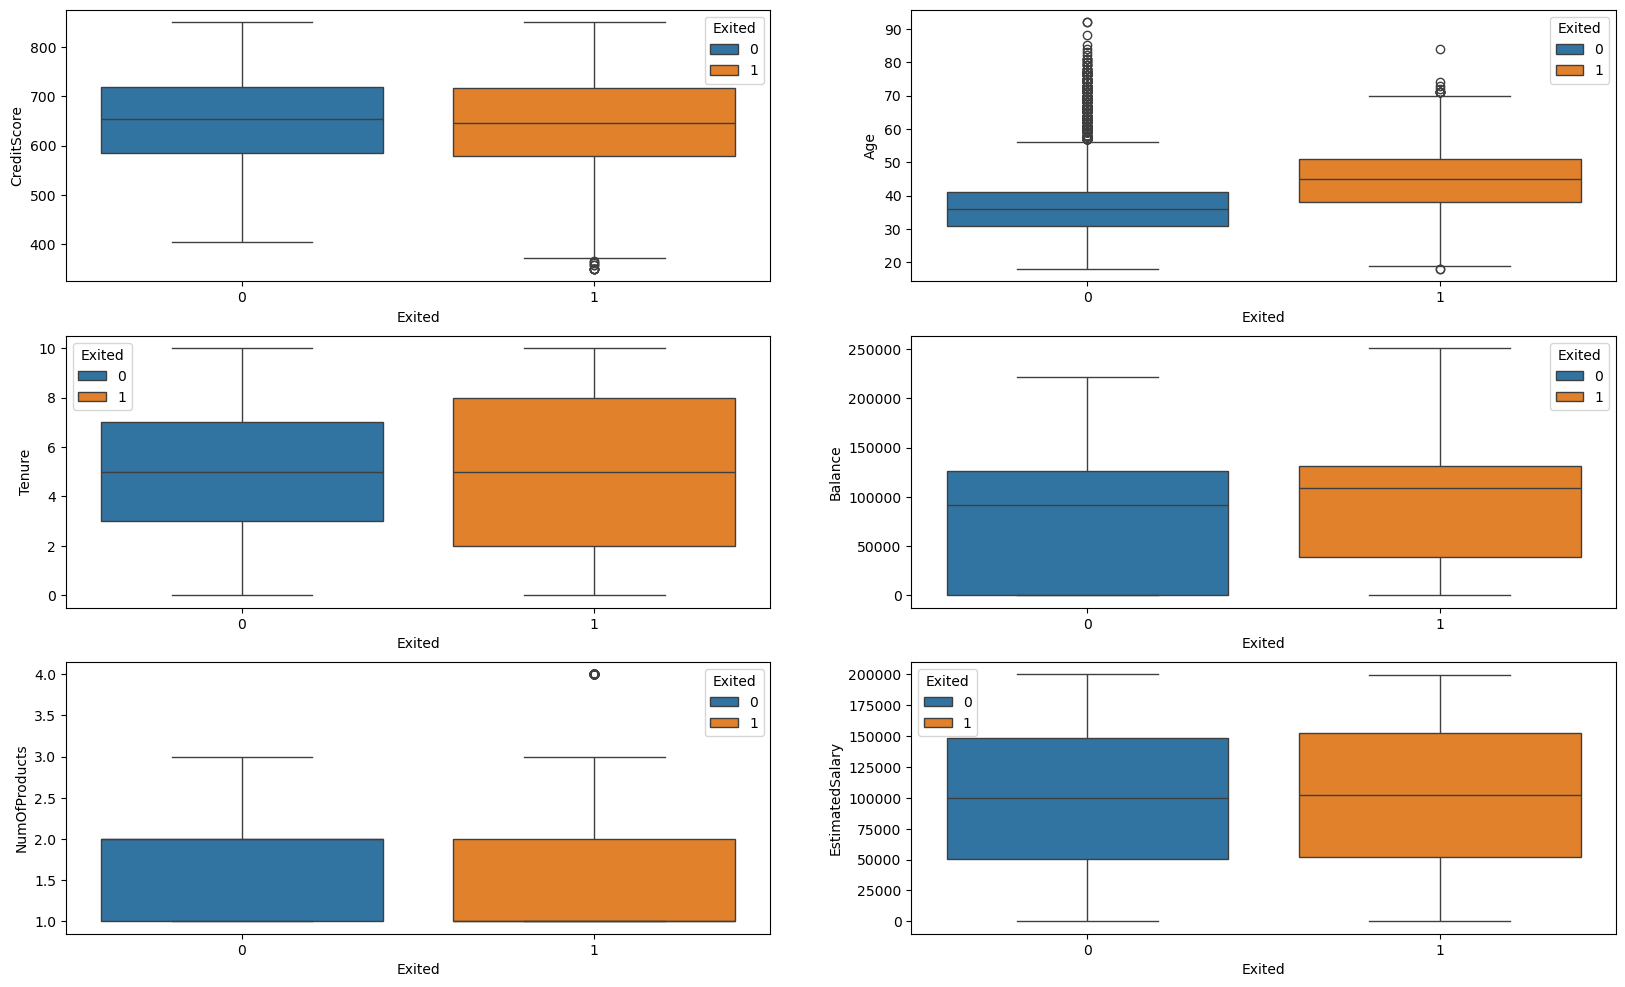

In [11]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
    plt.show()


#### We note the following:

There is no significant difference in the credit score distribution between retained and churned customers.

The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

Neither the product nor the salary has a significant effect on the likelihood to churn.

# Correlation Heat map

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

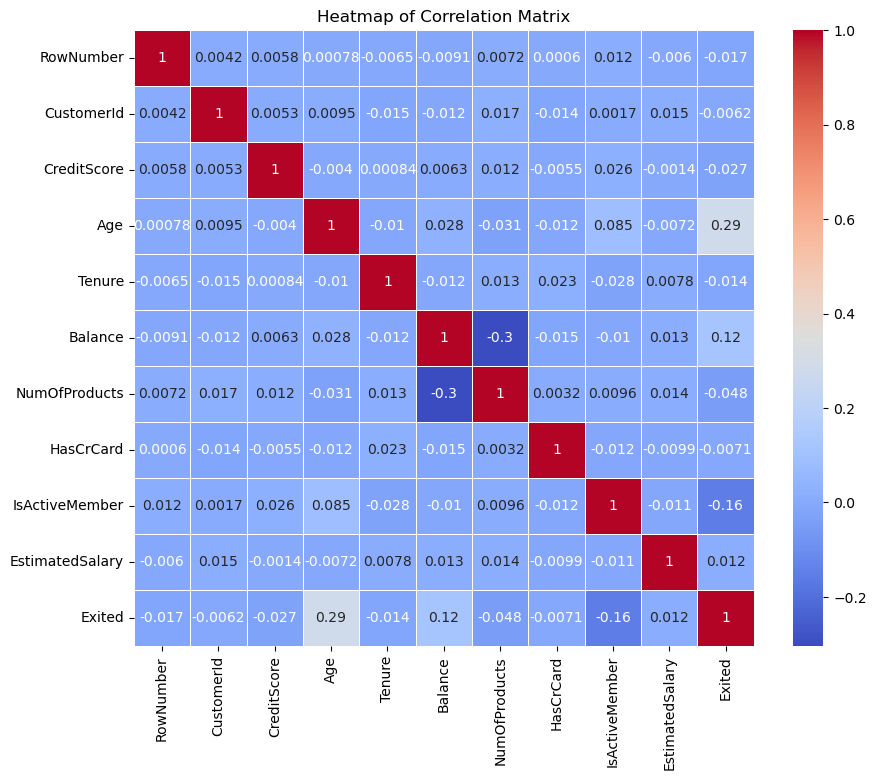

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("c:/users/lsund/downloads/Churn_Modelling.csv")

# Check first few rows
print(df.head())

# Select only numeric columns and calculate correlation
corr_matrix = df.select_dtypes(include='number').corr()

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [13]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

#### 
After loading, you check column names, data types, and sample rows.

Identify missing values, unusual entries, or errors.

Visualization helps to detect outliers and patterns in the data.

Correlation analysis shows how features relate to the target variable.


# Train and Test split

In [14]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


In [15]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

(-1.0, 5.0)

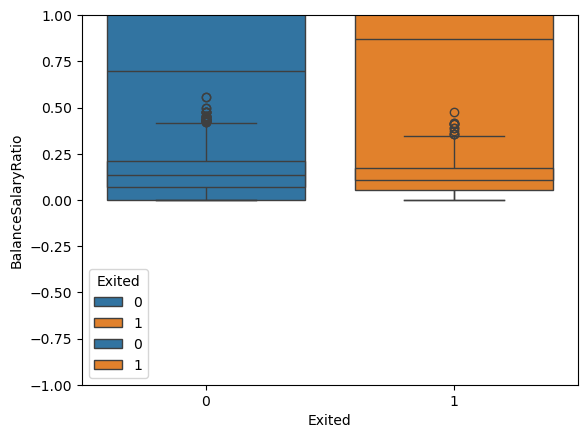

In [16]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [17]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [18]:
# Resulting Data Frame
df_train.head()

RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  \
8159       8160    15637427      Lu          461     Spain  Female   25   
6332       6333    15793046  Holden          619    France  Female   35   
8895       8896    15658972  Foster          699    France  Female   40   
5351       5352    15679048   Koger          558   Germany    Male   41   
4314       4315    15582276   Greco          638    France    Male   34   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
8159       6       0.00              2          1               1   
6332       4   90413.12              1          1               1   
8895       8  122038.34              1          1               0   
5351       2  124227.14              1          1               1   
4314       5  133501.36              1          0               1   

      EstimatedSalary  Exited  BalanceSalaryRatio  TenureByAge  \
8159         15306.29       0            0.000000     0.240000   
6332         20555.21       0            4.398550     0.114286   
8895        102085.35       0            1.195454     0.200000   
5351        111184.67       0            1.117305     0.048780   
4314        155643.04       0            0.857741     0.147059   

      CreditScoreGivenAge  
8159            18.440000  
6332            17.685714  
8895            17.475000  
5351            13.609756  
4314            18.764706

In [19]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

Exited  CreditScore  Age  Tenure    Balance  NumOfProducts  \
8159       0          461   25       6       0.00              2   
6332       0          619   35       4   90413.12              1   
8895       0          699   40       8  122038.34              1   
5351       0          558   41       2  124227.14              1   
4314       0          638   34       5  133501.36              1   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         15306.29            0.000000     0.240000            18.440000   
6332         20555.21            4.398550     0.114286            17.685714   
8895        102085.35            1.195454     0.200000            17.475000   
5351        111184.67            1.117305     0.048780            13.609756   
4314        155643.04            0.857741     0.147059            18.764706   

      HasCrCard  IsActiveMember Geography  Gender  
8159          1               1     Spain  Female  
6332          1               1    France  Female  
8895          1               0    France  Female  
5351          1               1   Germany    Male  
4314          0               1    France    Male

In [20]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

Exited  CreditScore  Age  Tenure    Balance  NumOfProducts  \
8159       0          461   25       6       0.00              2   
6332       0          619   35       4   90413.12              1   
8895       0          699   40       8  122038.34              1   
5351       0          558   41       2  124227.14              1   
4314       0          638   34       5  133501.36              1   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         15306.29            0.000000     0.240000            18.440000   
6332         20555.21            4.398550     0.114286            17.685714   
8895        102085.35            1.195454     0.200000            17.475000   
5351        111184.67            1.117305     0.048780            13.609756   
4314        155643.04            0.857741     0.147059            18.764706   

      HasCrCard  IsActiveMember Geography  Gender  
8159          1               1     Spain  Female  
6332          1               1    France  Female  
8895          1              -1    France  Female  
5351          1               1   Germany    Male  
4314         -1               1    France    Male

In [21]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == object or df_train[i].dtype == str):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

Exited  CreditScore  Age  Tenure    Balance  NumOfProducts  \
8159       0          461   25       6       0.00              2   
6332       0          619   35       4   90413.12              1   
8895       0          699   40       8  122038.34              1   
5351       0          558   41       2  124227.14              1   
4314       0          638   34       5  133501.36              1   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         15306.29            0.000000     0.240000            18.440000   
6332         20555.21            4.398550     0.114286            17.685714   
8895        102085.35            1.195454     0.200000            17.475000   
5351        111184.67            1.117305     0.048780            13.609756   
4314        155643.04            0.857741     0.147059            18.764706   

      HasCrCard  IsActiveMember  Geography_Spain  Geography_France  \
8159          1               1                1                -1   
6332          1               1               -1                 1   
8895          1              -1               -1                 1   
5351          1               1               -1                -1   
4314         -1               1               -1                 1   

      Geography_Germany  Gender_Female  Gender_Male  
8159                 -1              1           -1  
6332                 -1              1           -1  
8895                 -1              1           -1  
5351                  1             -1            1  
4314                 -1             -1            1

In [22]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

Exited  CreditScore       Age  Tenure   Balance  NumOfProducts  \
8159       0        0.222  0.094595     0.6  0.000000       0.333333   
6332       0        0.538  0.229730     0.4  0.360358       0.000000   
8895       0        0.698  0.297297     0.8  0.486406       0.000000   
5351       0        0.416  0.310811     0.2  0.495130       0.000000   
4314       0        0.576  0.216216     0.5  0.532094       0.000000   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         0.076118            0.000000     0.432000             0.323157   
6332         0.102376            0.003317     0.205714             0.305211   
8895         0.510225            0.000901     0.360000             0.300198   
5351         0.555744            0.000843     0.087805             0.208238   
4314         0.778145            0.000647     0.264706             0.330882   

      HasCrCard  IsActiveMember  Geography_Spain  Geography_France  \
8159          1               1                1                -1   
6332          1               1               -1                 1   
8895          1              -1               -1                 1   
5351          1               1               -1                -1   
4314         -1               1               -1                 1   

      Geography_Germany  Gender_Female  Gender_Male  
8159                 -1              1           -1  
6332                 -1              1           -1  
8895                 -1              1           -1  
5351                  1             -1            1  
4314                 -1             -1            1

In [23]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

# Model Development

In [24]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [25]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

#### 
Split the dataset into training and testing sets to evaluate model performance accurately.

Train models suitable for your task (e.g., Logistic Regression, Random Forest, XGBoost).

Evaluate performance using metrics like accuracy, precision, recall, and F1 score.


# Logistic regression

In [26]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

0.8151249999999999
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=100, max_iter=250, solver='liblinear')


In [27]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Exited)
best_model(log_pol2_Grid)

0.8553750000000001
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [28]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [29]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)


0.8544999485716948
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


# GridSearchCV Example (Random Forest)

In [30]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)


0.8631249999999999
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=3)


# LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

log_primal = LogisticRegression(
    C=100,
    max_iter=250,
    solver='lbfgs',   # multi-class friendly
    tol=1e-5
)

X_train = df_train.loc[:, df_train.columns != 'Exited']
y_train = df_train['Exited']

log_primal.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Fit logistic regression with polynomial degree 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])

log_pol2 = LogisticRegression(
    C=10,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=300,
    n_jobs=None,
    penalty='l2',
    random_state=None,
    solver='liblinear',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

log_pol2.fit(df_train_pol2, df_train.Exited)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [33]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [34]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

# RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest classifier
RF = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=8,
    max_features=6,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=3,
    min_weight_fraction_leaf=0.0,
    n_estimators=50,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

X_train = df_train.loc[:, df_train.columns != 'Exited']
y_train = df_train['Exited']

RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

# Evaluate using Accuracy, Precision, Recall, F1 Score


In [36]:
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.34      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [37]:
print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [38]:
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [39]:
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [40]:
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.52      0.65      1647

    accuracy                           0.89      8000
   macro avg       0.88      0.75      0.79      8000
weighted avg       0.89      0.89      0.87      8000



In [41]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])

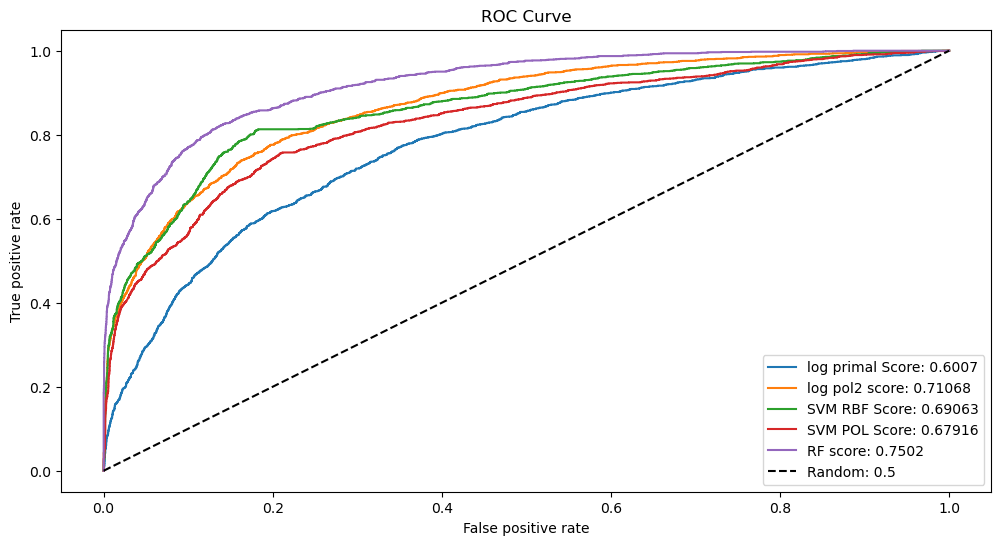

In [42]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [43]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

C:\Users\lsund\AppData\Local\Temp\ipykernel_19580\931878692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
C:\Users\lsund\AppData\Local\Temp\ipykernel_19580\931878692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)


(1996, 17)

In [44]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.80      0.41      0.54       389

    accuracy                           0.87      1996
   macro avg       0.84      0.69      0.73      1996
weighted avg       0.86      0.87      0.85      1996



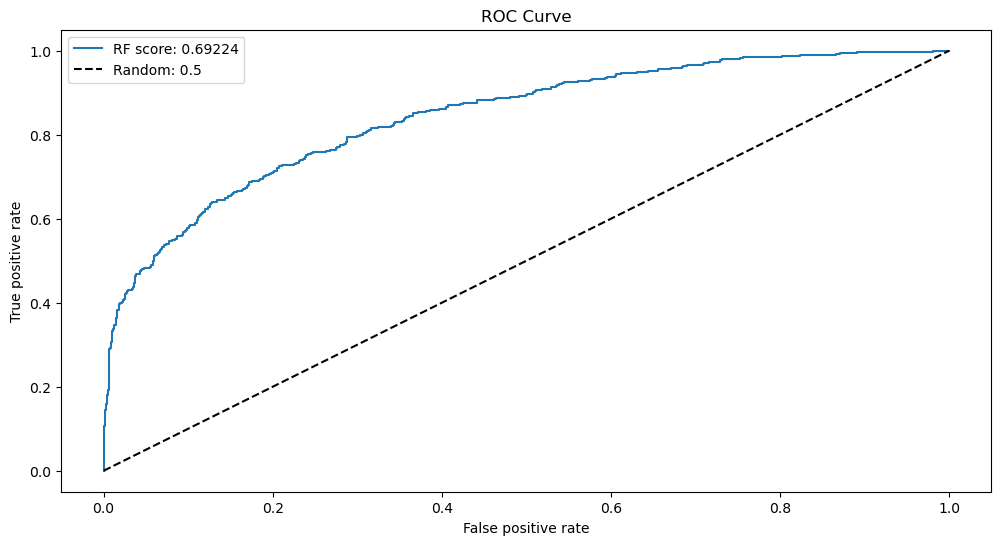

In [45]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# Cross-validation

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Cross-validation results function
def cv_results(model, X, y, model_name):
    from sklearn.model_selection import cross_validate
    import numpy as np
    
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    res = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    print(f"\n{model_name} Cross-validation results:")
    for s in scoring:
        print(f"{s}: {np.mean(res['test_'+s]):.4f} ± {np.std(res['test_'+s]):.4f}")

# Run CV for both models
cv_results(log_reg, X, y, "Logistic Regression")
cv_results(rf_clf, X, y, "Random Forest")


Logistic Regression Cross-validation results:
accuracy: 0.8131 ± 0.0090
precision: 0.6299 ± 0.0610
recall: 0.2240 ± 0.0253
f1: 0.3303 ± 0.0350

Random Forest Cross-validation results:
accuracy: 0.8602 ± 0.0065
precision: 0.7593 ± 0.0299
recall: 0.4712 ± 0.0171
f1: 0.5813 ± 0.0184


# Hyperparameter tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Random Forest tuning
rf_params = {
    'n_estimators':[100,200,400],
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2']
}
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, 
                           cv=3, n_iter=20, scoring='roc_auc', n_jobs=-1, random_state=42)
rs_rf.fit(X_train, y_train)
print("Best RF params:", rs_rf.best_params_)

# Logistic Regression tuning
log_params = {'C':[0.01,0.1,1,10]}
gs_log = GridSearchCV(LogisticRegression(max_iter=1000), log_params,
                      cv=3, scoring='roc_auc', n_jobs=-1)
gs_log.fit(X_train, y_train)
print("Best Logistic params:", gs_log.best_params_)

Best RF params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best Logistic params: {'C': 10}


# Random Forest feature importance

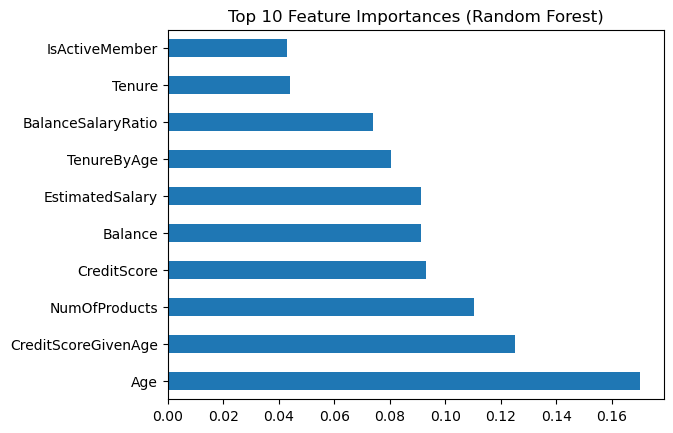

In [48]:
from sklearn.ensemble import RandomForestClassifier

# 1. Model define
rf_clf = RandomForestClassifier(random_state=42)

# 2. Fit with training data
rf_clf.fit(X_train, y_train)

# 3. Now you can check feature importance
feature_names = X_train.columns

import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf_clf.feature_importances_, index=feature_names)
feat_imp.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

# SNAP

In [50]:
print("X_train shape:", X_train.shape)
print("shap_values[0] shape:", shap_values[0].shape)
print("shap_values[1] shape:", shap_values[1].shape)

X_train shape: (8000, 16)
shap_values[0] shape: (16, 2)
shap_values[1] shape: (16, 2)


# LIME

In [53]:
X = df.drop(['Exited','CustomerId','Surname'], axis=1)
y = df['Exited']

In [54]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender and Geography
for col in ['Gender','Geography']:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop ID-like column
X = df.drop(['Exited','CustomerId','Surname'], axis=1, errors='ignore')
y = df['Exited']

# Encode categoricals
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit model again
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [62]:
from lime.lime_tabular import LimeTabularExplainer

# Create LIME explainer
explainer = LimeTabularExplainer(
    X_train.values, 
    feature_names=X_train.columns, 
    class_names=['No Churn','Churn'], 
    discretize_continuous=True
)

# Explain first test sample
exp = explainer.explain_instance(
    X_test.values[0], 
    rf_clf.predict_proba, 
    num_features=10
)

# Show explanation
exp.show_in_notebook(show_table=True, show_all=False)

C:\Users\lsund\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Final submission.csv

In [59]:
df = pd.read_csv("c:/users/lsund/downloads/Churn_Modelling.csv")
df_original = df.copy()   # safe backup

In [60]:
preds = rf_clf.predict(X_test)

submission = pd.DataFrame({
    'CustomerID': df.loc[X_test.index, 'CustomerId'],  # note spelling!
    'Churn_Prediction': preds
})
submission.to_csv('submission.csv', index=False)
print("submission.csv saved!")

submission.csv saved!


# Requirements.txt

####
pandas
numpy
scikit-learn
matplotlib
seaborn
shap
lime